<a href="https://colab.research.google.com/github/Xemarij/Computer-Vision/blob/main/10_Dilation%2C_Erosion_and_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Dilation, Erosion and Edge Detection**

####**In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

**Use Python cv2 code to erode, dialate, open and close an image and display the images with matplotlib**

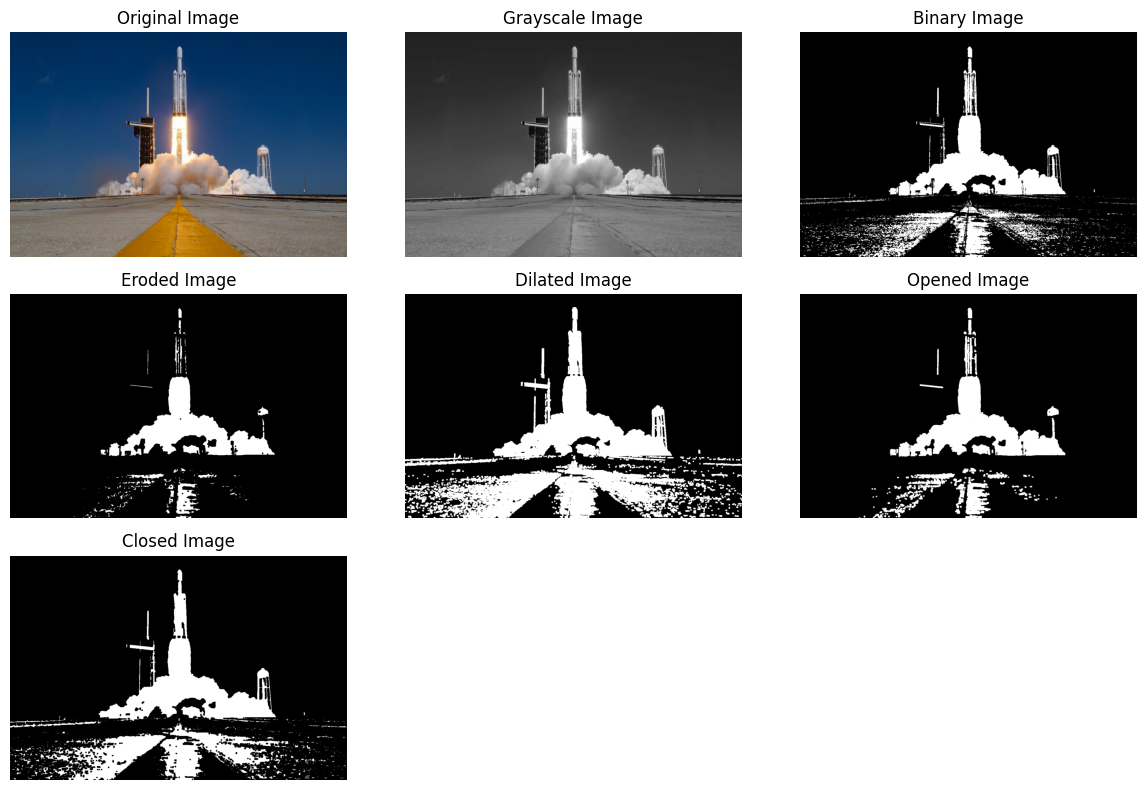

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Threshold the image (optional, for better results in morphology)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Step 4: Define a kernel for the morphological operations
kernel = np.ones((5, 5), np.uint8)  # You can change the size of the kernel

# Step 5: Apply morphological operations
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Step 6: Display the images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')

# Grayscale image
plt.subplot(3, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Binary image
plt.subplot(3, 3, 3)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

# Eroded image
plt.subplot(3, 3, 4)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

# Dilated image
plt.subplot(3, 3, 5)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

# Opened image
plt.subplot(3, 3, 6)
plt.title('Opened Image')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

# Closed image
plt.subplot(3, 3, 7)
plt.title('Closed Image')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Canny Edge Detection**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

**Use Python cv2 Canny edge function to detect the edges of an image and display the image with matplotlib.**

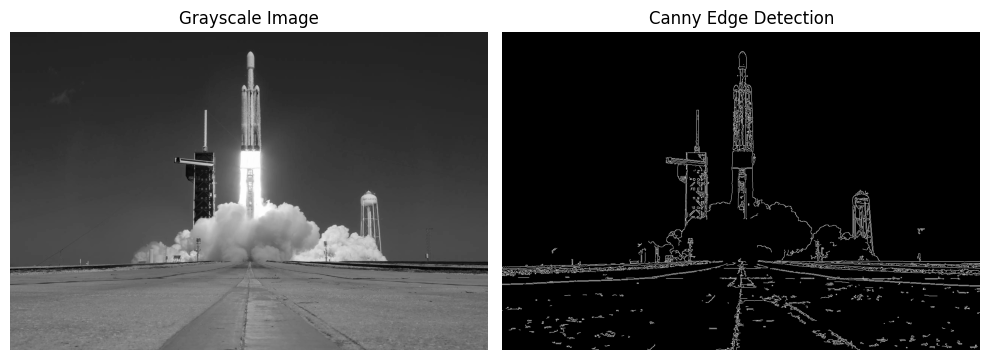

In [3]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Canny edge detection
# Lower and upper thresholds for Canny edge detection
lower_threshold = 50
upper_threshold = 150
edges = cv2.Canny(gray_image, lower_threshold, upper_threshold)

# Step 4: Display the images
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Auto Canny**

**Use Python cv2 auto canny method to display the edges of an image and display the image with matplotlib.**

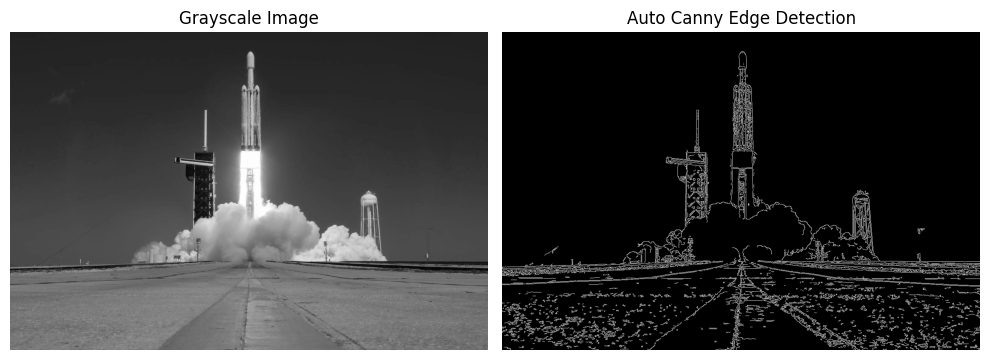

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def auto_canny(image, sigma=0.33):
    # Compute the median of the single channel pixel intensities
    median = np.median(image)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * median))
    upper = int(min(255, (1.0 + sigma) * median))
    edged = cv2.Canny(image, lower, upper)

    return edged

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply auto Canny edge detection
edges = auto_canny(gray_image)

# Step 4: Display the images
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Edge-detected image (Auto Canny)
plt.subplot(1, 2, 2)
plt.title('Auto Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
